In [5]:
!unzip '/content/Animal_Dataset.zip'

Archive:  /content/Animal_Dataset.zip
   creating: dataset/
   creating: dataset/Testing/
   creating: dataset/Testing/bears/
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: da

In [6]:
#Data augumentation
#means data augumentation converts one image into other multiple images
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)  #rescale is like normalisation,shear_range is like one action is coming inside and one action is going outside,horizontal flip is like from leftside to rightside it is flipping
test_gen = ImageDataGenerator(rescale=(1./255))  #--> (0 to 255) convert to (0 to 1) here the values are converting in between 0 and 1

In [8]:

train = train_gen.flow_from_directory('/content/dataset/Training',   #in output we are getting 1238 images belongs to 4 classes
                                      target_size=(120, 120),       #each and every image is in different sizes so to make all the images in same size we are givoing target_size=(120,120),if we give less resolution like 120,120 then the computational speed is very fast
                                      class_mode='categorical',     #in this class_model is categorical because in CNN we always use the categorical only
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/dataset/Testing',        #in output we are geting 326 images belongs to 4 classes
                                    target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [9]:
train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [10]:
#CNN
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense   #we are importing the layers
from tensorflow.keras.models import Sequential


In [12]:

model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))   #we are giving first as Convolution2D ,20 means  here 20 feature map is created as 3*3 3by3 matrix,activation function is rule,in input_size we are giving what ever we are giving in the target_size as (120,120)
model.add(MaxPooling2D(pool_size=(2,2)))     #the output of convolution2D is the input for MaxPooling2D,it returns output as matrices,but ANN wont accept the matrices so
model.add(Flatten())                        #with the help of  flatten we are converting the matrices into vectors
model.add(Dense(45,activation='relu'))     #this is hidden layer
model.add(Dense(4,activation='softmax'))    #this is one output layer contains 4 neurons,if we are having multiclass then we use softmax
#we can create only one flatten() and only one output layer

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(train,batch_size=8,validation_data=test,epochs=1)   #checking the accuracy


155/155 [==============================] - 24s 156ms/step - loss: 0.3256 - accuracy: 0.9023 - val_loss: 0.1397 - val_accuracy: 0.9847


In [18]:
model.save('animal.h5')    #saving the model

In [19]:
# Testing

import numpy as np
from tensorflow.keras.preprocessing import image

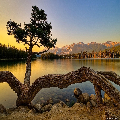

In [22]:

img = image.load_img('/content/1.jpg',target_size=(120,120)) #here we are giving the target si
img

In [23]:
img = image.img_to_array(img)    #here the image is converted in to the array
img

array([[[187., 170., 142.],
        [188., 171., 145.],
        [184., 166., 142.],
        ...,
        [ 69., 121., 168.],
        [ 68., 120., 167.],
        [ 73., 121., 169.]],

       [[189., 172., 144.],
        [187., 170., 144.],
        [189., 173., 148.],
        ...,
        [ 72., 124., 171.],
        [ 69., 121., 168.],
        [ 74., 122., 170.]],

       [[191., 171., 144.],
        [189., 173., 147.],
        [188., 171., 145.],
        ...,
        [ 73., 124., 171.],
        [ 71., 122., 167.],
        [ 77., 124., 168.]],

       ...,

       [[ 82.,  66.,  30.],
        [ 90.,  68.,  29.],
        [ 55.,  37.,   0.],
        ...,
        [131., 105.,  78.],
        [ 86.,  69.,  39.],
        [ 54.,  34.,   7.]],

       [[ 70.,  54.,  20.],
        [ 58.,  41.,  13.],
        [ 62.,  46.,  21.],
        ...,
        [ 37.,  28.,  23.],
        [ 62.,  47.,  24.],
        [103.,  87.,  62.]],

       [[ 66.,  50.,  16.],
        [ 76.,  61.,  22.],
        [ 88.,  

In [24]:

img = np.expand_dims(img,axis=0)    #here we are expanding the dimensions
img

array([[[[187., 170., 142.],
         [188., 171., 145.],
         [184., 166., 142.],
         ...,
         [ 69., 121., 168.],
         [ 68., 120., 167.],
         [ 73., 121., 169.]],

        [[189., 172., 144.],
         [187., 170., 144.],
         [189., 173., 148.],
         ...,
         [ 72., 124., 171.],
         [ 69., 121., 168.],
         [ 74., 122., 170.]],

        [[191., 171., 144.],
         [189., 173., 147.],
         [188., 171., 145.],
         ...,
         [ 73., 124., 171.],
         [ 71., 122., 167.],
         [ 77., 124., 168.]],

        ...,

        [[ 82.,  66.,  30.],
         [ 90.,  68.,  29.],
         [ 55.,  37.,   0.],
         ...,
         [131., 105.,  78.],
         [ 86.,  69.,  39.],
         [ 54.,  34.,   7.]],

        [[ 70.,  54.,  20.],
         [ 58.,  41.,  13.],
         [ 62.,  46.,  21.],
         ...,
         [ 37.,  28.,  23.],
         [ 62.,  47.,  24.],
         [103.,  87.,  62.]],

        [[ 66.,  50.,  16.],
       

In [25]:
np.argmax(model.predict(img))   #here we are predicting the image

1/1 [==============================] - 0s 112ms/step


2